# Assignment #4

# 1. Fitting probability distributions (30 points)

The file `/data/IMERG/GPM_3IMERGDF_06/IMERG_07_2000-2018_rc.nc` provides daily estimates from IMERG of precipitation for each day of every July between 2000 and 2018. Extract the time series of data for Nairobi (Kenya), Beirut (Lebanon),  Shanghai (China), Sydney (Australia), Miami (United States), Bogota (Colombia), Johannesburg (South Africa), Toronto (Canada), and Buenos Aires (Argentina). After removing all days where the precipitation is 0, fit an exponential distribution for the data at each site. Using subplots, make a 3x3 figure where each subplot contains the histogram of each site's data (also zero precipitation removed) and the corresponding PDF of the fitted exponential distribution. To finalize, write a paragraph explaining how these plots can be interpreted with an emphasis on understanding the differences in intensity of daily rainfall between these cities in July.

* **WE STRONGLY RECOMMEND** to not read in all the data in at once (your container might crash). Subset directly from storage instead (e.g., `fp['precipcal'][:,900,1800]`).
* The daily precipitation is defined via the variable `precipcal` in the file.

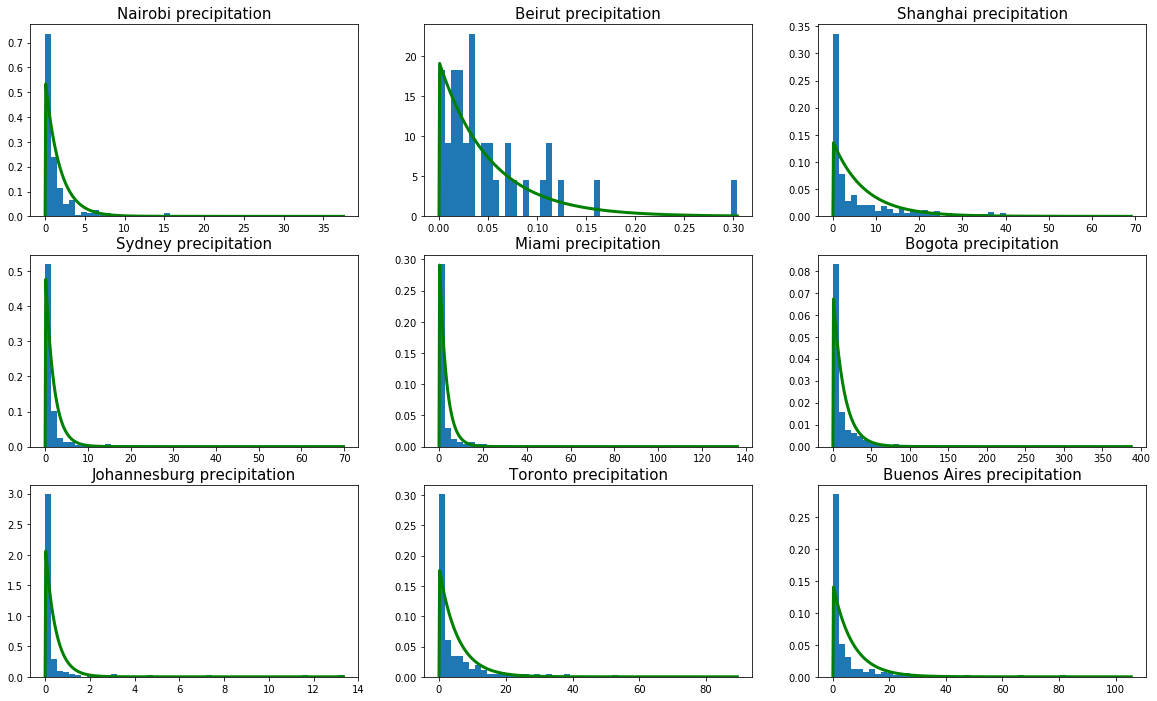

By looking at the trend of the fitted line for each site, based on the idea that the longer the tail, the more intense the rainfall the site may have experienced, and the shorter the tail, the less intense the rainfall the site may have 
experienced, it can be concluded that Shanghai, Miamii, Bogota, Toronto and Buenos Aires are the sites that may have 
experienced some really intense rainfalls.


In [84]:
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import scipy.stats

sites = {'Nairobi':{'lat':-1.280423,'lon':36.816311},
         'Beirut':{'lat':33.888630,'lon':35.495480},
         'Shanghai':{'lat':31.22222,'lon':121.45806},
         'Sydney':{'lat':-33.86785,'lon':151.20732},
         'Miami':{'lat':25.761681,'lon':-80.191788},
         'Bogota':{'lat':4.60971,'lon':-74.08175},
         'Johannesburg':{'lat':-26.195246,'lon':28.034088},
         'Toronto':{'lat':43.653908,'lon':-79.384293},
         'Buenos Aires':{'lat':-34.603722,'lon':-58.381592}}

file = '/data/IMERG/GPM_3IMERGDF_06/IMERG_07_2000-2018_rc.nc'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]

for site in sites:
    lat = sites[site]['lat']
    lon = sites[site]['lon']
    if lon < 0:lon = 360 + lon
    sites[site]['ilat'] = int(np.argmin(np.abs(lats - lat)))
    sites[site]['ilon'] = int(np.argmin(np.abs(lons - lon)))

vars = {'precipcal':'mm/day'}
for site in sites:
    for var in vars:
        ilat = sites[site]['ilat']
        ilon = sites[site]['ilon']
        sites[site][var] = fp[var][:,ilat,ilon][fp[var][:, ilat, ilon] != 0]

fig = plt.figure(figsize=(20, 12))
i = 0
for site in sites:
    i += 1
    plt.subplot(3,3,i)
    plt.hist(sites[site]['precipcal'], bins = 50, density = 1)
    x = np.linspace(0, np.max(sites[site]['precipcal']), 500)
    params = scipy.stats.expon.fit(sites[site]['precipcal'])
    plt.plot(x,scipy.stats.expon.pdf(x,params[0],params[1]),'g-', lw=3)                          
    plt.title('%s precipitation' %site, fontsize = 15)
plt.show()
print("By looking at the trend of the fitted line for each site, based on the idea that the longer the tail, the more intense the rainfall the site may have experienced, and the shorter the tail, the less intense the rainfall the site may have \nexperienced, it can be concluded that Shanghai, Miamii, Bogota, Toronto and Buenos Aires are the sites that may have \nexperienced some really intense rainfalls.")

# 2. Descriptive statistics of IMERG (30 points)

Using the same data as that used for problem 2 (daily precipitation for all Julys between 2000 and 2018), for the region defined below, produce maps of the 1st, 5th, 50th, 95th, and 99th percentiles, mean, mean absolute deviation, IQR, and skewness. Produce a single figure that contains 3x3 subplots where each subplot is a map of the respective statistic. Then write a paragraph to explain the computed results. 

* Region bounding box: Longitudes: -120 to -65; Latitudes: 20 to 45
* **WE STRONGLY RECOMMEND** to not read in all the data in at once (your contained might crash). Subset directly from storage instead (e.g., `fp['precipcal'][:,1000:1200,400:700]`).
* To understand the distribution of actual rainfall (i.e., only when it is raining), we would want to get rid of the 0s before performing the analysis; however, for this problem do the analysis with the 0s included for simplicity.

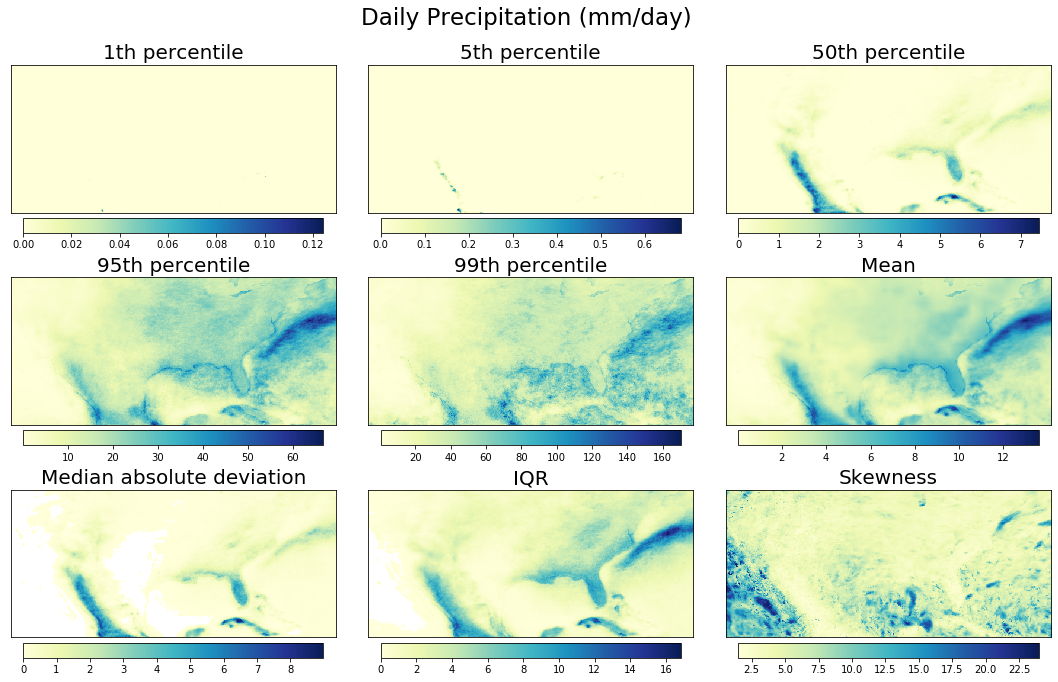

Based on the 5 percentile plots, the mean plot, the median absolute and the IQR plots below, it can be rougly assumed that at the designated area, the rainfall distribution is quite diverse. For example, in the 50th percentile plot, there are 
already some places with color showing that these certain areas already have experienced certain level of precipitation 
while other areas have experienced none. And lastly, the skewness plot doesn't really tell us anything important.


In [88]:
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import scipy.stats

file = '/data/IMERG/GPM_3IMERGDF_06/IMERG_07_2000-2018_rc.nc'
fp = nc.Dataset(file)
lats = fp['lat'][:]
lons = fp['lon'][:]
minlat = 20
maxlat = 45
minlon = -120
maxlon = -65

iminlat = int(np.argmin(np.abs(fp['lat'][:] - minlat)))
imaxlat = int(np.argmin(np.abs(fp['lat'][:] - maxlat)))
iminlon = int(np.argmin(np.abs(fp['lon'][:] - minlon)))
imaxlon = int(np.argmin(np.abs(fp['lon'][:] - maxlon)))

precipcal = fp['precipcal'][:, iminlat:imaxlat, iminlon:imaxlon]
#print(iminlat, imaxlat, iminlon, imaxlon)

fig = plt.figure(figsize=(15,9))
i = 0

for pct in [1,5,50,95,99]:
    i += 1
    plt.subplot(3,3,i)
    tmp = np.percentile(precipcal,pct,axis = 0)
    tmp = np.ma.masked_array(tmp,tmp < 0)
    im = plt.imshow(np.flipud(tmp),cmap = plt.get_cmap('YlGnBu'))
    plt.title('%dth percentile' % pct,fontsize=20)
    plt.xticks([])
    plt.yticks([])
    cb = plt.colorbar(shrink = 0.9,orientation = 'horizontal',pad = 0.03)

plt.subplot(3,3,6)
plt.imshow(np.flipud(np.mean(precipcal, axis = 0)), cmap = plt.get_cmap('YlGnBu'))
plt.title('Mean', fontsize = 20)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(shrink = 0.9,orientation = 'horizontal',pad = 0.03)

plt.subplot(3,3,7)
tmp = np.flipud(scipy.stats.median_absolute_deviation(precipcal, axis = 0))
tmp = np.ma.masked_array(tmp, tmp == 0)
plt.imshow(tmp,cmap = plt.get_cmap('YlGnBu'))
plt.title('Median absolute deviation', fontsize=20)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(shrink = 0.9,orientation ='horizontal',pad = 0.03)

plt.subplot(3,3,8)
tmp = np.flipud(np.percentile(precipcal, 75, axis = 0) - np.percentile(precipcal, 25, axis = 0))
tmp = np.ma.masked_array(tmp,tmp == 0)
plt.imshow(tmp, cmap = plt.get_cmap('YlGnBu'))
plt.title('IQR', fontsize = 20)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(shrink = 0.9,orientation = 'horizontal',pad = 0.03)

plt.subplot(3,3,9)
tmp = np.flipud(scipy.stats.skew(precipcal, axis = 0))
tmp = np.ma.masked_array(tmp, np.flipud(precipcal[0,:,:]) < 0)
plt.imshow(tmp, cmap = plt.get_cmap('YlGnBu'))
plt.title('Skewness', fontsize = 20)
plt.xticks([])
plt.yticks([])
cb = plt.colorbar(shrink = 0.9,orientation = 'horizontal',pad = 0.03)

plt.suptitle('Daily Precipitation (mm/day)',fontsize = 23,y = 1.05)
plt.tight_layout()
plt.show()
print("Based on the 5 percentile plots, the mean plot, the median absolute and the IQR plots below, it can be rougly assumed that at the designated area, the rainfall distribution is quite diverse. For example, in the 50th percentile plot, there are \nalready some places with color showing that these certain areas already have experienced certain level of precipitation \nwhile other areas have experienced none. And lastly, the skewness plot doesn't really tell us anything important.")

# 3. Comparing IMERG to ERA-Interim (40 points)

Use the [IMERG](https://pmm.nasa.gov/gpm/imerg-global-image) satellite precipitation product to evaluate [ERA-Interim's](https://www.ecmwf.int/en/forecasts/datasets/reanalysis-datasets/era-interim) simulated precipitation at a monthly time step between January, 2001 and December, 2014. The evaluation should only be performed at latitudes above -50 degrees and below 50 degrees. Within this domain, at each pixel, compute the linear correlation (scipy.stats.pearsonr) between the time series of precipitation of IMERG and ERA-Interim. Make a plot using imshow of the resulting 2D array of correlation coefficients over the domain (lat:-50 to 50,lon:0 to 360). Provide a paragraph that describes the resulting correlation coefficient map with an emphasis on explaining where the datasets match well and where they don't.

* The ERA-Interim file can be found here: `/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc`
* The IMERG file can be found here: `/data/IMERG/GPM_3IMERGM.06_upscaled.nc`
* Precipitation in the IMERG database is called `precipitation` while it is called `precip` in the ERA-Interim file
* Note that the lat/lon axes are swapped in the IMERG file. After reading in the data from IMERG, use `np.swapaxes(data_imerg,1,2)` to swap the axes. Note that variable data_imerg here is the 3D array that you read in. It does not need to be named data_imerg.

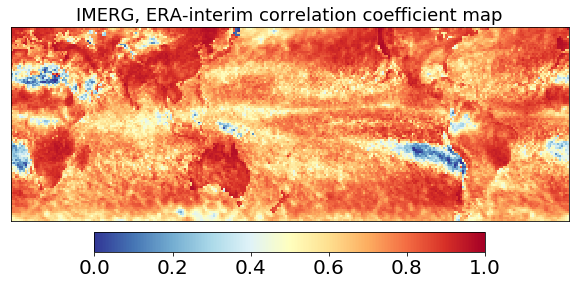

The deeper the color in the correlation coefficient map as shown below, the closer the data in IMERG and in ERA-interim at the same pixel point. And for the places where color is blue, the similarity between data from two sources is really low.


In [87]:
import numpy as np
import netCDF4 as nc
import datetime
import matplotlib.pyplot as plt
import scipy.stats

file = '/data/era-interim/era_interim_monthly_197901_201512_upscaled.nc'
fp = nc.Dataset(file)
im = '/data/IMERG/GPM_3IMERGM.06_upscaled.nc'
imp = nc.Dataset(im)
impf = imp['precipitation'][:, :, :]
#impf = np.swapaxes(imp['precipitation'][:,:,:],1,2)

minlat = -50
maxlat = 50
minlon = 0
maxlon = 360

iminlat = int(np.argmin(np.abs(fp['lat'][:] - minlat)))
imaxlat = int(np.argmin(np.abs(fp['lat'][:] - maxlat)))
iminlon = int(np.argmin(np.abs(fp['lon'][:] - minlon)))
imaxlon = int(np.argmin(np.abs(fp['lon'][:] - maxlon)))
#print(iminlat, imaxlat, iminlon, imaxlon)

dates = nc.num2date(fp['time'][:],units=fp['time'].units,calendar='standard')
tmp = []
for date in dates:
    tmp.append(datetime.datetime(date.year,date.month,1))
dates = np.array(tmp)
#print(dates)
#print(np.where(dates == datetime.datetime(2001, 1, 1, 0, 0)))
#print(np.where(dates == datetime.datetime(2015, 1, 1, 0, 0)))
m = (dates >= datetime.datetime(2001,1,1)) & (dates <= datetime.datetime(2015,1,1))

ilats = imp['lat'][:]
ilons = imp['lon'][:]

lats = fp['lat'][:]
lons = fp['lon'][:]
      
era = fp['precip'][264:432, iminlat:imaxlat, iminlon:imaxlon]
#print(iminlat, imaxlat, iminlon, imaxlon)
#imerg = impf[264:432, iminlat:imaxlat, iminlon:imaxlon]
imerg = impf[7:175, iminlon:imaxlon, iminlat:imaxlat]
imerg = np.swapaxes(imerg, 1, 2)
#print(imerg)
#print(era)
era = np.array(era)
imerg = np.array(imerg)
corrf = []
        
for i in range(100):
    for j in range(287):
        corr = scipy.stats.pearsonr(era[:, i ,j], imerg[:, i, j])[0]
        corrf.append(corr)
corrf = np.array(corrf)
corrf = corrf.reshape(100, 287)
#print(corrf)

plt.figure(figsize = (10, 10))
plt.imshow(np.flipud(corrf), cmap = plt.get_cmap('RdYlBu_r'), vmin = 0, vmax = 1)
cb = plt.colorbar(orientation = 'horizontal', shrink = 0.7, pad = 0.02)
cb.ax.tick_params(labelsize = 20)
plt.xticks([])
plt.yticks([])
plt.title('IMERG, ERA-interim correlation coefficient map', fontsize = 18)
plt.show()
print("The deeper the color in the correlation coefficient map as shown below, the closer the data in IMERG and in ERA-interim at the same pixel point. And for the places where color is blue, the similarity between data from two sources is really low.")